<a href="https://colab.research.google.com/github/junsookim76/Ewha_2023/blob/main/Lecture14_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
#a=beta hc
a=1/207.225 

#b= B~
b=10.591

In [7]:
calc0=np.zeros(30)

for j in np.arange(30):
  calc0[j]=(2*j+1)*np.exp(-a*b*j*(j+1))
#  print(j,calc)

#print(calc0)

qr=np.sum(calc0[:])
print(qr)

19.90291524445614


In [9]:
j0=np.arange(0,30)
print(j0)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


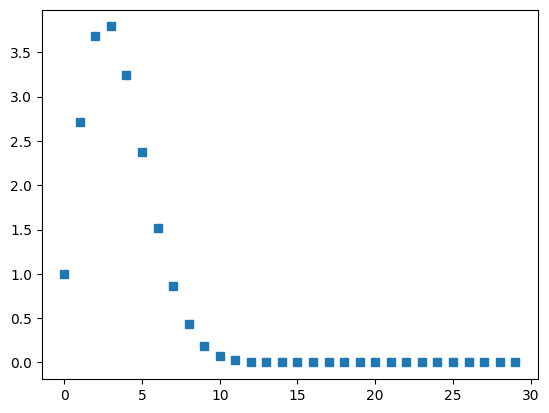

In [15]:
plt.plot(j0,calc0,'s')

Text(0, 0.5, '$q$')

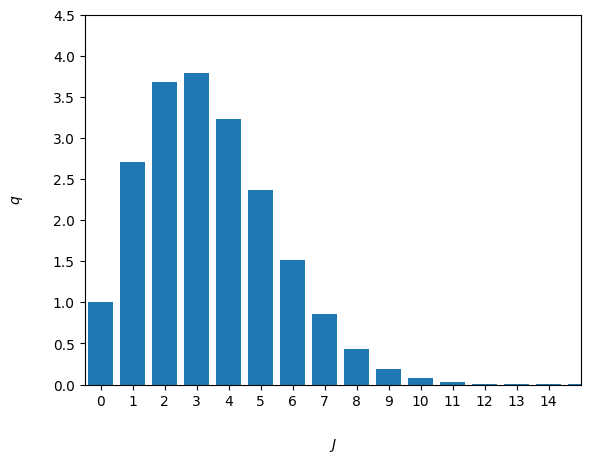

In [19]:
fig, ax = plt.subplots()

ax.bar(j0,calc0)

plt.ylim(0, 4.5)
plt.xlim(-0.5, 15)
plt.xticks(np.arange(0., 15, 1))
plt.xlabel('$J$', labelpad=20)
plt.ylabel('$q$', labelpad=20)

2. Arrhenius Parameter

In [20]:
import numpy as np
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

%matplotlib inline 

In [24]:
kr=np.array([0.011,0.035,0.105,0.343,0.789,2.17,20.0,145])
print(type(kr))
print(kr.shape)
print(kr)

<class 'numpy.ndarray'>
(8,)
[1.10e-02 3.50e-02 1.05e-01 3.43e-01 7.89e-01 2.17e+00 2.00e+01 1.45e+02]


In [25]:
temp=np.array([700,730,760,790,810,840,910,1000])

In [26]:
lkr=np.log(kr)
print(lkr)

[-4.50986001 -3.35240722 -2.25379493 -1.07002483 -0.23698896  0.77472717
  2.99573227  4.97673374]


In [27]:
rtemp=1000/temp
print(rtemp)

[1.42857143 1.36986301 1.31578947 1.26582278 1.2345679  1.19047619
 1.0989011  1.        ]


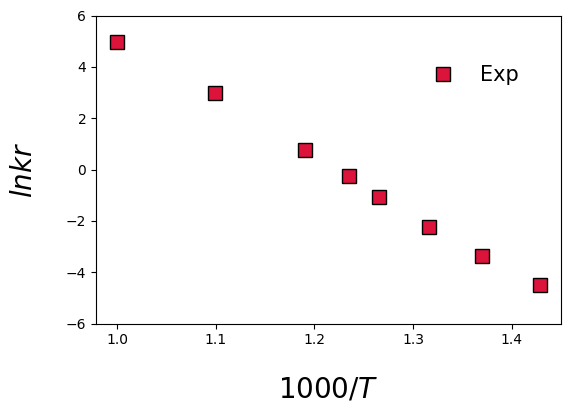

In [41]:
fig, ax = plt.subplots(figsize=(6, 4))


ax.plot(rtemp, lkr, label='Exp', color='black', linestyle="None",\
         marker='s', markersize=10, markeredgewidth=1, markeredgecolor='black', mfc='crimson')


plt.xlabel('$1000/T$', labelpad=20)
plt.ylabel('$ln kr$', labelpad=20)

plt.ylim(-6, 6)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('axes', labelsize=20) # fontsize of the x and y labels

ax.legend(edgecolor='none',bbox_to_anchor=(0.95,0.9), prop={'size': 15})


In [51]:
def func(x, a0, a1):
    return a0*x+a1

# Linear curve fitting    
popt1, pcov1 = curve_fit(func, rtemp, lkr)
        
# Calcultate r square value
residuals1 = lkr - func(rtemp, *popt1)
ss_res1 = np.sum(residuals1**2)    
ss_tot1 = np.sum((lkr-np.mean(lkr))**2)
r_squared1 = 1 - (ss_res1 / ss_tot1)
    
print('\nCurve Fit : y = %.3f*x+%.3f --> R^2 = %.3f' % (popt1[0], popt1[1], r_squared1))

print('\nSlope = %.5f' % (popt1[0]))
print('Intercept = %.5f \n' % (popt1[1]))

ea=-popt1[0]*1000*8.3145
prea=np.exp(popt1[1])

print('\nActivation Energy = %.3e J/mol' %ea)
print('PreExponential Factor = %.3e dm^3/mol/s' %prea)


Curve Fit : y = -22.651*x+27.707 --> R^2 = 0.999

Slope = -22.65075
Intercept = 27.70711 


Activation Energy = 1.883e+05 J/mol
PreExponential Factor = 1.079e+12 dm^3/mol/s


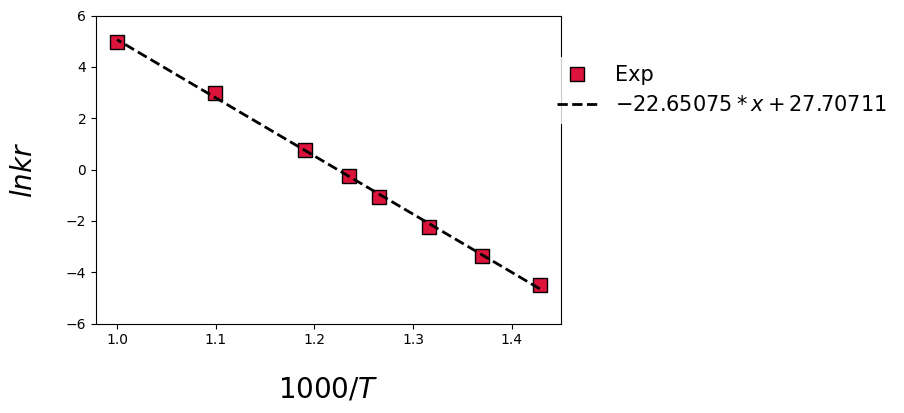

In [43]:
fig, ax = plt.subplots(figsize=(6, 4))


ax.plot(rtemp, lkr, label='Exp', color='black', linestyle="None",\
         marker='s', markersize=10, markeredgewidth=1, markeredgecolor='black', mfc='crimson')

ax.plot(rtemp, func(rtemp, popt1[0], popt1[1]), label=r'$%.5f*x+%.5f$' %(popt1[0],popt1[1]), linewidth= 2, linestyle='--', color='black')

plt.xlabel('$1000/T$', labelpad=20)
plt.ylabel('$ln kr$', labelpad=20)

plt.ylim(-6, 6)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('axes', labelsize=20) # fontsize of the x and y labels

ax.legend(edgecolor='none',bbox_to_anchor=(0.95,0.9), prop={'size': 15})

